In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tools.eval_measures import rmse, aic

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load data - US Macro Economic Data from 1959-Q1 to 2009-Q3

data = sm.datasets.macrodata.load_pandas().data

In [3]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [4]:
#for explanation purpose we only take two variables - realgdp and realdpi

#realgdp - Real Gross Domestic Product: measure that reflects the value of all goods and services produced by an economy after adjusting for inflation

#realdpi - Real Disposable Personal Income: Net income left over after taxes and adjusted for inflation

In [5]:
df = data[['realgdp','realdpi']]
df.index = data['year']

In [6]:
df

,realgdp,realdpi
year,,
1959.0,2710.349,1886.9
1959.0,2778.801,1919.7
1959.0,2775.488,1916.4
1959.0,2785.204,1931.3
1960.0,2847.699,1955.5
...,...,...
2008.0,13324.600,9838.3
2008.0,13141.920,9920.4
2009.0,12925.410,9926.4


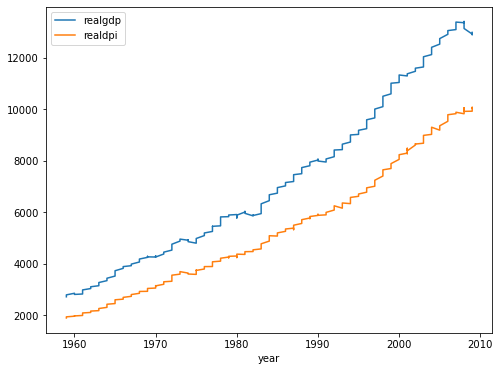

In [7]:
#Visualize the time series

df.plot(figsize=(8,6))
plt.show()

In [8]:
#Granger Causality Tests - realdpi granger causes realgdp
result = grangercausalitytests(df,maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0451  , p=0.8320  , df_denom=199, df_num=1
ssr based chi2 test:   chi2=0.0458  , p=0.8306  , df=1
likelihood ratio test: chi2=0.0458  , p=0.8306  , df=1
parameter F test:         F=0.0451  , p=0.8320  , df_denom=199, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8221  , p=0.0619  , df_denom=196, df_num=2
ssr based chi2 test:   chi2=5.7882  , p=0.0553  , df=2
likelihood ratio test: chi2=5.7064  , p=0.0577  , df=2
parameter F test:         F=2.8221  , p=0.0619  , df_denom=196, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1094  , p=0.0276  , df_denom=193, df_num=3
ssr based chi2 test:   chi2=9.6665  , p=0.0216  , df=3
likelihood ratio test: chi2=9.4402  , p=0.0240  , df=3
parameter F test:         F=3.1094  , p=0.0276  , df_denom=193, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0785  , p=0.0852  

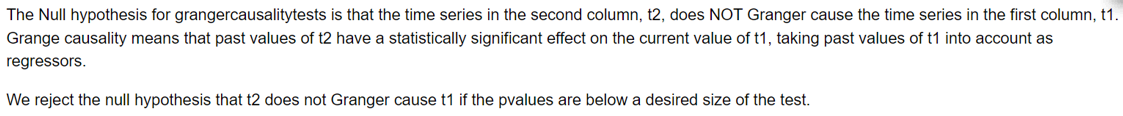

In [9]:
#reordering the dataframe
df = df[['realdpi','realgdp']]

In [10]:
df

,realdpi,realgdp
year,,
1959.0,1886.9,2710.349
1959.0,1919.7,2778.801
1959.0,1916.4,2775.488
1959.0,1931.3,2785.204
1960.0,1955.5,2847.699
...,...,...
2008.0,9838.3,13324.600
2008.0,9920.4,13141.920
2009.0,9926.4,12925.410


In [11]:
#Granger Causality Tests - realgdp granger causes realdpi
result = grangercausalitytests(df,maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.6870 , p=0.0005  , df_denom=199, df_num=1
ssr based chi2 test:   chi2=12.8783 , p=0.0003  , df=1
likelihood ratio test: chi2=12.4844 , p=0.0004  , df=1
parameter F test:         F=12.6870 , p=0.0005  , df_denom=199, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.9020  , p=0.0013  , df_denom=196, df_num=2
ssr based chi2 test:   chi2=14.1562 , p=0.0008  , df=2
likelihood ratio test: chi2=13.6799 , p=0.0011  , df=2
parameter F test:         F=6.9020  , p=0.0013  , df_denom=196, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.6719  , p=0.0132  , df_denom=193, df_num=3
ssr based chi2 test:   chi2=11.4152 , p=0.0097  , df=3
likelihood ratio test: chi2=11.1013 , p=0.0112  , df=3
parameter F test:         F=3.6719  , p=0.0132  , df_denom=193, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.5250  , p=0.0084  

In [12]:
#reordering the dataframe again
df = df[['realgdp','realdpi']]

In [13]:
#cointegration test - the null hypothesis:
#no cointegration present between two time series(or no statistically significant relationship between two time series )
ts.coint(df['realgdp'],df['realdpi'])

(-2.8141222651066458,
 0.16123263358242135,
 array([-3.95147899, -3.36654523, -3.0655127 ]))

In [14]:
# Stationarity Test
result = adfuller(df['realgdp'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.750463
p-value: 0.998246
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575


In [15]:
# Stationarity Test
result = adfuller(df['realdpi'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.986025
p-value: 1.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.575


**The series is not stationary. Let us do differencing**

In [16]:
df_differenced = df.diff().dropna()

In [17]:
df_differenced

,realgdp,realdpi
year,,
1959.0,68.452,32.8
1959.0,-3.313,-3.3
1959.0,9.716,14.9
1960.0,62.495,24.2
1960.0,-13.309,10.6
...,...,...
2008.0,-90.666,-220.7
2008.0,-182.680,82.1
2009.0,-216.510,6.0


In [18]:
# Stationarity Test
result = adfuller(df_differenced['realgdp'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.305696
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.575


In [19]:
# Stationarity Test
result = adfuller(df_differenced['realdpi'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.864893
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.575


In [20]:
ts.coint(df_differenced['realgdp'],df_differenced['realdpi'])

(-3.761534312299772,
 0.01524230364913689,
 array([-3.95175692, -3.36669739, -3.06561782]))

**Series is now stationary**

In [21]:
#split series into train and test

#Last 10 observations are kept as test data

df_train, df_test = df_differenced.iloc[:-10,:], df_differenced.iloc[-10:,:]

In [22]:
print(df_train.shape)
print(df_test.shape)

(192, 2)
(10, 2)


In [23]:
df_train

,realgdp,realdpi
year,,
1959.0,68.452,32.8
1959.0,-3.313,-3.3
1959.0,9.716,14.9
1960.0,62.495,24.2
1960.0,-13.309,10.6
...,...,...
2006.0,167.239,175.1
2006.0,46.524,83.5
2006.0,3.454,45.2


In [24]:
df_test

,realgdp,realdpi
year,,
2007.0,104.076,12.5
2007.0,117.132,41.2
2007.0,70.140,2.3
2008.0,-24.384,-59.4
2008.0,48.401,232.2
2008.0,-90.666,-220.7
2008.0,-182.680,82.1
2009.0,-216.510,6.0
2009.0,-23.906,151.1


In [25]:
#Select order(p) of VAR Model

model = VAR(df_train)
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  15.34723417611597
BIC :  15.449399833541518
FPE :  4626167.564518605
HQIC:  15.388616020102464 

Lag Order = 2
AIC :  15.333400243493962
BIC :  15.504296247291883
FPE :  4562697.449640763
HQIC:  15.402627724808601 

Lag Order = 3
AIC :  15.337865630442979
BIC :  15.577995038965915
FPE :  4583316.527167819
HQIC:  15.435147829344922 

Lag Order = 4
AIC :  15.370207341805134
BIC :  15.680079444629277
FPE :  4734344.443417374
HQIC:  15.495755858331481 

Lag Order = 5
AIC :  15.398917773841266
BIC :  15.779048199353571
FPE :  4872850.916165699
HQIC:  15.552946768722148 

Lag Order = 6
AIC :  15.417239800299027
BIC :  15.868150625656787
FPE :  4963870.654601675
HQIC:  15.599966036688556 

Lag Order = 7
AIC :  15.456863810082483
BIC :  15.979083673608697
FPE :  5165835.166499906
HQIC:  15.668506696124165 

Lag Order = 8
AIC :  15.469172074896534
BIC :  16.063236290976455
FPE :  5231606.969504161
HQIC:  15.709953707142159 

Lag Order = 9
AIC :  15.474506863828413
BIC :  16

**AIC drops to lowest at lag 2, then increases at lag 3**


**Let's go with lag 2 model**

In [26]:
#train the VAR model of selected order(p)

model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 22, Jan, 2022
Time:                     12:14:39
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    15.5043
Nobs:                     190.000    HQIC:                   15.4026
Log likelihood:          -1985.87    FPE:                4.56270e+06
AIC:                      15.3334    Det(Omega_mle):     4.33171e+06
--------------------------------------------------------------------
Results for equation realgdp
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             23.807343         6.111430            3.896           0.000
L1.realgdp         0.176227         0.078131            2.256           0.024
L1.realdpi         0.213713         0.085309            2.505         

In [27]:
#checking for correlation of errors using ljung-box test

sm.stats.acorr_ljungbox(model_fitted.resid['realgdp'], lags=2, return_df=True)

,lb_stat,lb_pvalue
1,0.005034,0.943437
2,0.030500,0.984866


In [28]:
sm.stats.acorr_ljungbox(model_fitted.resid['realdpi'], lags=2, return_df=True)

,lb_stat,lb_pvalue
1,0.043507,0.834773
2,0.440435,0.802344


**Errors are independently distributed(white noise)**

<AxesSubplot:xlabel='year'>

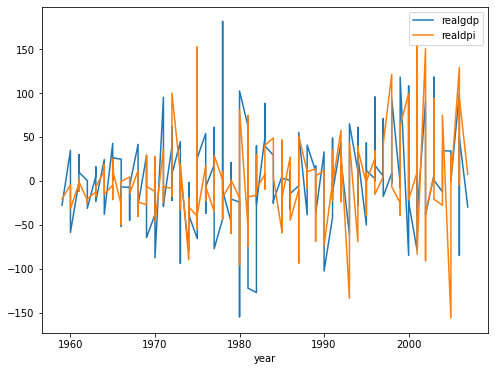

In [29]:
model_fitted.resid.plot(figsize=(8,6))

In [30]:
#Forecasting

df_train.values[-2:]

array([[ 94.763, 126.3  ],
       [ 39.222,  41.4  ]])

In [31]:
lagged_values = df_train.values[-2:]
forecast = pd.DataFrame(model_fitted.forecast(y=lagged_values, steps=10), index = df_test.index, 
                        columns = ['realgdp_1d', 'realdpi_1d'])
forecast

,realgdp_1d,realdpi_1d
year,,
2007.0,61.872982,47.739232
2007.0,53.948996,41.742951
2007.0,56.171082,42.552316
2008.0,54.953081,42.023999
2008.0,55.109616,42.001007
2008.0,54.865410,41.937065
2008.0,54.841362,41.893996
2009.0,54.775171,41.878378
2009.0,54.754309,41.859837


In [32]:
#Transforming to Original Forecast

forecast["realgdp_forecasted"] = df["realgdp"].iloc[-10-1] + forecast['realgdp_1d'].cumsum()
forecast["realdpi_forecasted"] = df["realdpi"].iloc[-10-1] + forecast['realdpi_1d'].cumsum() 

forecast

,realgdp_1d,realdpi_1d,realgdp_forecasted,realdpi_forecasted
year,,,,
2007.0,61.872982,47.739232,13161.773982,9877.939232
2007.0,53.948996,41.742951,13215.722978,9919.682183
2007.0,56.171082,42.552316,13271.894060,9962.234500
2008.0,54.953081,42.023999,13326.847141,10004.258499
2008.0,55.109616,42.001007,13381.956757,10046.259506
2008.0,54.865410,41.937065,13436.822166,10088.196571
2008.0,54.841362,41.893996,13491.663528,10130.090566
2009.0,54.775171,41.878378,13546.438699,10171.968945
2009.0,54.754309,41.859837,13601.193008,10213.828781


In [33]:
#Actual vs Predicted - RealGDP
realgdp_pred = pd.DataFrame()
realgdp_pred['actual'] = df.iloc[-10:,0]
realgdp_pred['predicted'] = forecast['realgdp_forecasted']

In [34]:
realgdp_pred

,actual,predicted
year,,
2007.0,13203.977,13161.773982
2007.0,13321.109,13215.722978
2007.0,13391.249,13271.894060
2008.0,13366.865,13326.847141
2008.0,13415.266,13381.956757
2008.0,13324.600,13436.822166
2008.0,13141.920,13491.663528
2009.0,12925.410,13546.438699
2009.0,12901.504,13601.193008


In [35]:
#Performance metric
print('RMSE of realgdp: ',rmse(realgdp_pred['actual'],realgdp_pred['predicted']))

RMSE of realgdp:  385.09767033047774


In [36]:
#Actual vs Predicted - RealDPI
realdpi_pred = pd.DataFrame()
realdpi_pred['actual'] = df.iloc[-10:,1]
realdpi_pred['predicted'] = forecast['realdpi_forecasted']

In [37]:
realdpi_pred

,actual,predicted
year,,
2007.0,9842.7,9877.939232
2007.0,9883.9,9919.682183
2007.0,9886.2,9962.234500
2008.0,9826.8,10004.258499
2008.0,10059.0,10046.259506
2008.0,9838.3,10088.196571
2008.0,9920.4,10130.090566
2009.0,9926.4,10171.968945
2009.0,10077.5,10213.828781


In [38]:
#Performance metric
print('RMSE of realdpi: ',rmse(realdpi_pred['actual'],realdpi_pred['predicted']))

RMSE of realdpi:  164.78037034959144
